## Rolling Regression

In [41]:
import numpy as np
import pandas as pd

## Function to calculate ols regressions
from scipy.stats import linregress

In [31]:
# N = number of observations
N = 500

## x_t is a random walk
x = np.cumsum(np.random.normal(size=N))

## Derek's & Chris's parameter values
a = .22
b = 7.0

## Normal disturbances
z = np.random.normal(size=N,loc=0.0, scale=2.2)

## Y is cointegrated with x
y = a + b * x + z

In [32]:
import matplotlib.pyplot as plt

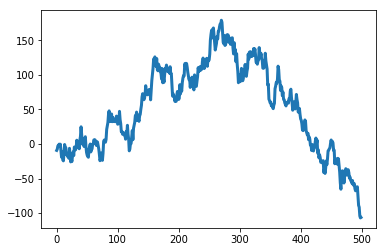

In [33]:
plt.plot(y, linewidth=3)

In [34]:
## First difference spot prices
dS = np.diff(y)

## First difference futures prices
dF = np.diff(x)

In [35]:
dS[:10]

array([  1.86781703,   4.73729113,   0.05062712,   2.33930067,
        -2.11318872,   2.07759577, -10.18077932,  -8.64852341,
         7.72504769, -11.46060883])

In [36]:
dS[-10:]

array([ -3.03108669,   5.18118781,  -2.47474255,   3.06102891,
       -14.07909466, -12.72743079,  -2.73489425, -12.56524989,
        -2.88530486,   0.66482684])

In [37]:
dF[:10]

array([-0.02165768,  0.3430923 ,  0.58872933,  0.66544319, -0.65292935,
       -0.0535536 , -1.67050633, -0.27680797,  0.22409745, -1.0341915 ])

In [38]:
dF[-10:]

array([-0.52890052,  0.82392349,  0.5553723 ,  0.26993512, -2.51476801,
       -2.03906322, -0.24550795, -1.74701953, -0.52498064,  0.21707436])

In [39]:
dS.shape

(499,)

In [40]:
dF.shape

(499,)

In [28]:
## Number of lookback observations in moving estimation window
M = 60

## The length of the sample for estimated hedge ratios (taking into account that we require M initial observations for our first h)
L = N - M

In [29]:
## Empty storate array for estimated rolling hedge ratios
h = np.empty(L)

In [51]:
## starting indices for 60-days rolling window
ibeg = 0
iend = 60

for i in range(L):
    reg = linregress(dF[ibeg:iend], dS[ibeg:iend])
    h[i] = reg.slope
    ibeg += 1
    iend += 1

In [52]:
## Turn the estimated hedge ratios into a pandas series for convenience
ts = pd.Series(h)

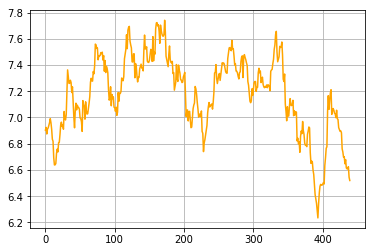

In [53]:

## ... such as plotting
ts.plot(grid=True, color="orange")